In [1]:
from mp_api.client import MPRester
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from jupyter_jsmol.pymatgen import quick_view
from pymatgen.core.operations import *
from pymatgen.analysis.diffraction.xrd import XRDCalculator

In [2]:
mp_id = "mp-37906"
api_key = "U5rwd3sdglPsztvgTrc7TwUsvvfTEfOn"

# Structure from material id
with MPRester(api_key) as m:
    structure = m.get_structure_by_material_id(mp_id)

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

# Diffractogramme pour un rayonnement X incident Cu Kα de longueur d’onde λ=1.54060 Å sur le cristal de LiMgN

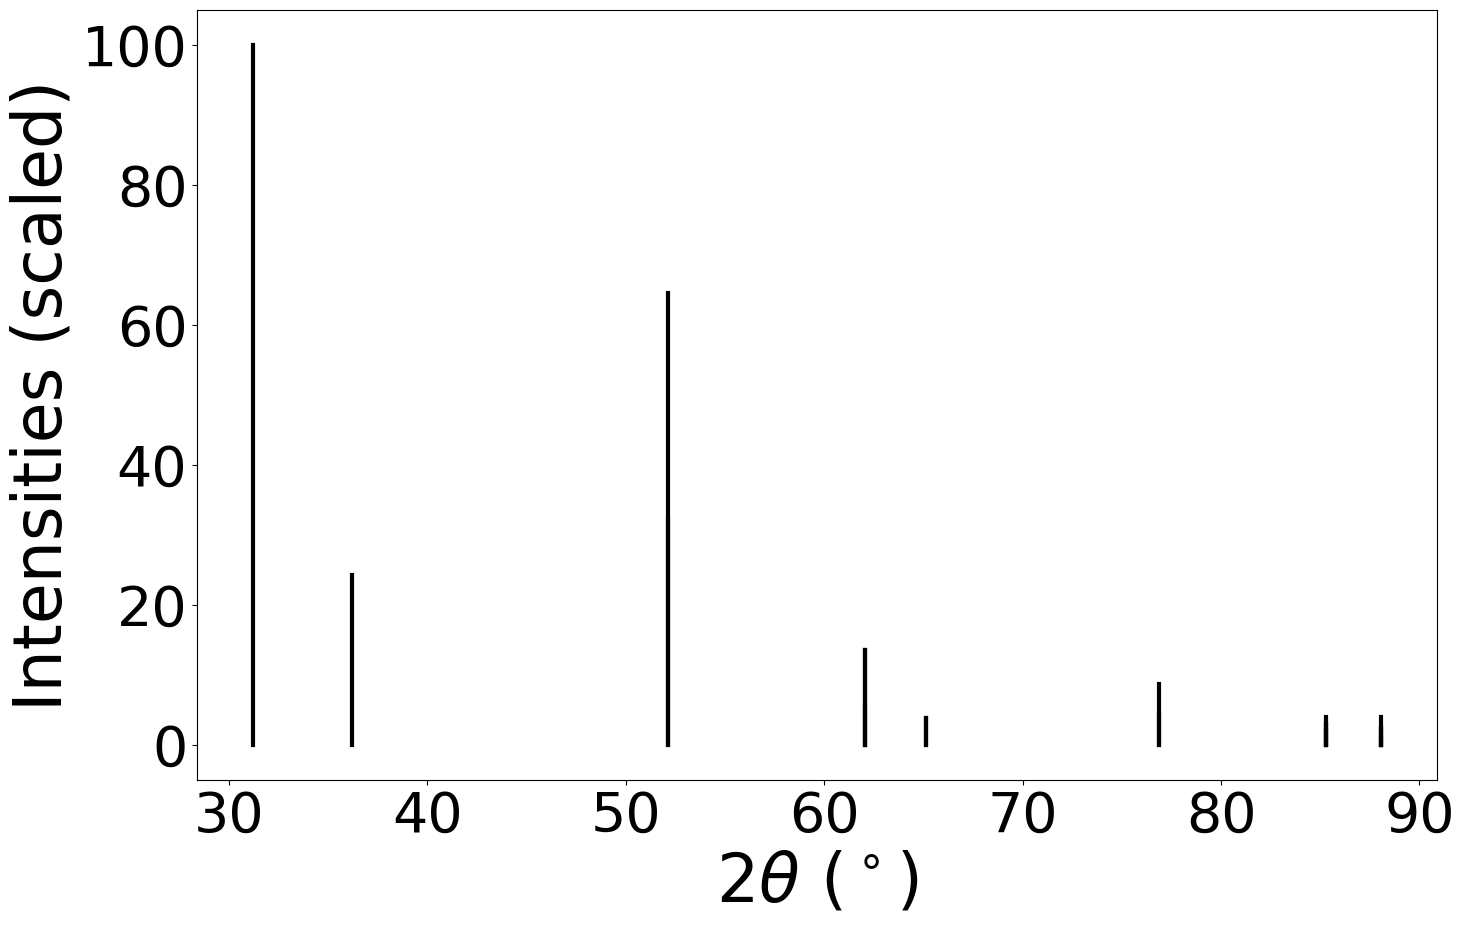

In [3]:
wave_length = 1.54060
xrd = XRDCalculator(wavelength=wave_length)
pattern = xrd.get_pattern(structure, scaled=True)
hkls = pattern.hkls
xrd.show_plot(structure, annotate_peaks=False)

# Zoomons sur les 3 premiers pics

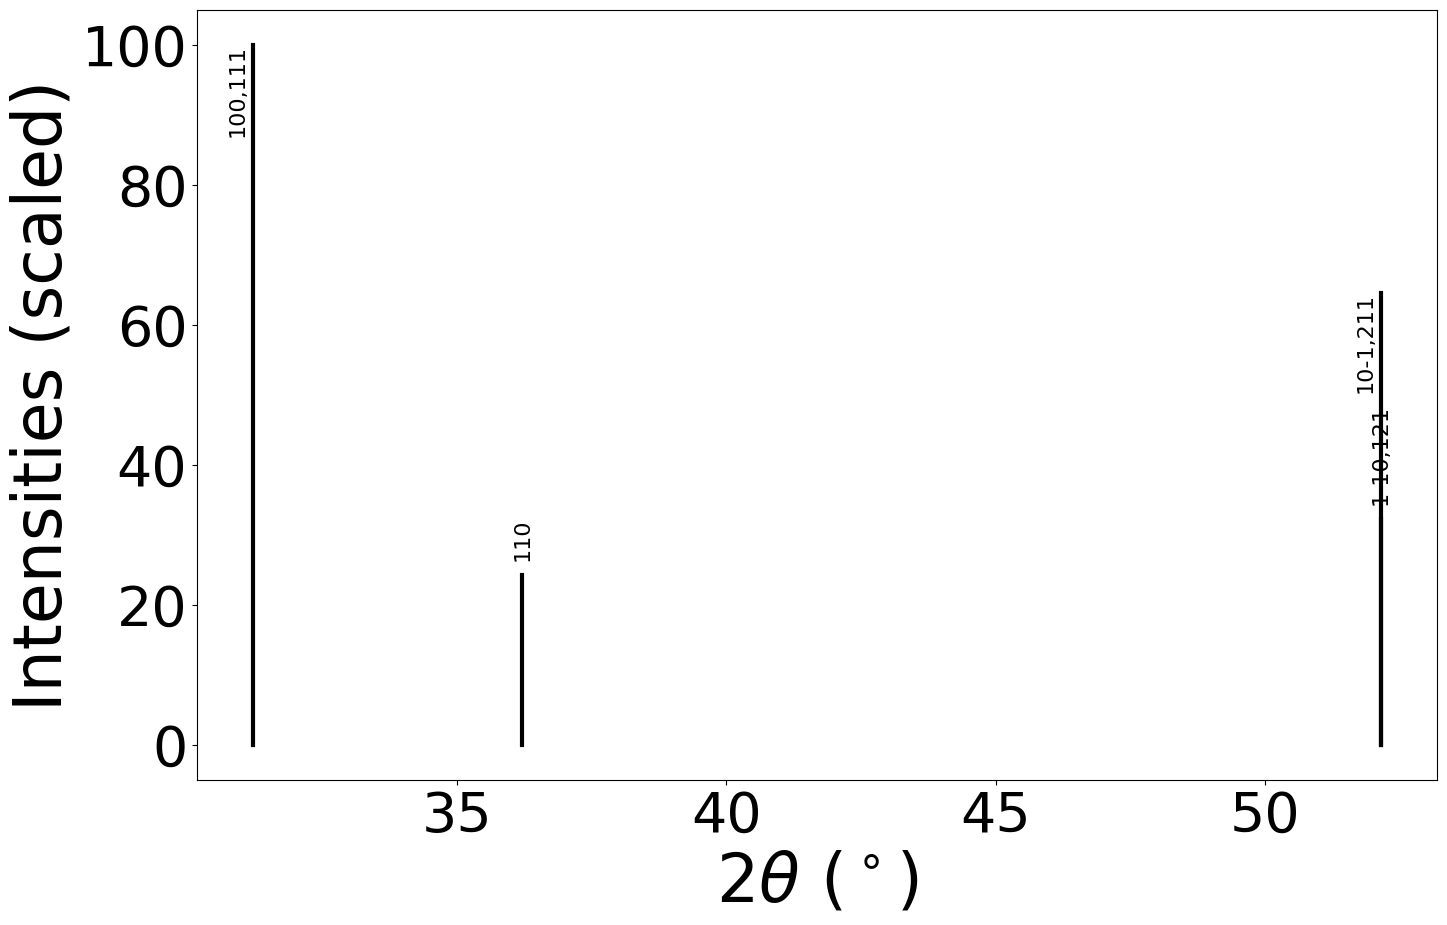

In [4]:
xrd.show_plot(structure, two_theta_range=(0,55))

In [5]:
print("Premier pic\n------------------------------")
print(f"Angle 2θ (en °): {pattern.x[0]}°")
print(f"Intensité (en % par rapport au plus grand pic): {pattern.y[0]} %")
print(f"Indices hkl associés: {hkls[0][0]['hkl']}, de multiplicité {hkls[0][0]['multiplicity']}")
print(f"Distance interréticulaire: {pattern.d_hkls[0]}Å")

Premier pic
------------------------------
Angle 2θ (en °): 31.22734020942338°
Intensité (en % par rapport au plus grand pic): 100.0 %
Indices hkl associés: (1, 0, 0), de multiplicité 6
Distance interréticulaire: 2.861977Å


In [6]:
print("Second pic\n------------------------------")
print(f"Angle 2θ (en °): {pattern.x[1]}°")
print(f"Intensité (en % par rapport au plus grand pic): {pattern.y[1]} %")
print(f"Indices hkl associés: {hkls[1][0]['hkl']}, de multiplicité {hkls[1][0]['multiplicity']}")
print(f"Distance interréticulaire: {pattern.d_hkls[1]}Å")

Second pic
------------------------------
Angle 2θ (en °): 36.21335924693611°
Intensité (en % par rapport au plus grand pic): 24.276109968202014 %
Indices hkl associés: (1, 1, 0), de multiplicité 6
Distance interréticulaire: 2.4785444859704717Å


In [7]:
print("Troisième pic\n------------------------------")
print(f"Angle 2θ (en °): {pattern.x[2]}°")
print(f"Intensité (en % par rapport au plus grand pic): {pattern.y[2]} %")
print(f"Indices hkl associés: {hkls[2][0]['hkl']}, de multiplicité {hkls[2][0]['multiplicity']}")
print(f"Distance interréticulaire: {pattern.d_hkls[2]}Å")

Troisième pic
------------------------------
Angle 2θ (en °): 52.14645344638324°
Intensité (en % par rapport au plus grand pic): 64.50143980970913 %
Indices hkl associés: (1, 0, -1), de multiplicité 4
Distance interréticulaire: 1.7525957727800137Å


# Explications théoriques

Lorsque des rayons X sont envoyés sur des cristaux, il apparaît des phénomènes d'interférences constructives dans certaines directions et destructives dans d'autres. À partir du diffractogramme obtenu, il est possible de déterminer la position de tous les atomes de la structure composant ce cristal.

Les pics de ce diffractogramme sont trouvables grâce à la loi de Bragg :
$2 d \sin{\theta} = n \lambda$

avec:
- d: la distance interréticulaire
- $\theta$: le demi-angle de réflexion
- n: l'ordre de réflexion
- $\lambda$: la longeur des rayons X utilisés (ici $1.54060 \AA$)
